# Семинар 2. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Physicochemical Properties of Protein Tertiary Structure Data Set

RMSD-Size of the residue.

F1 - Total surface area.

F2 - Non polar exposed area.

F3 - Fractional area of exposed non polar residue.

F4 - Fractional area of exposed non polar part of residue.

F5 - Molecular mass weighted exposed area.

F6 - Average deviation from standard exposed area of residue.

F7 - Euclidian distance.

F8 - Secondary structure penalty.

F9 - Spacial Distribution constraints (N,K Value).


Читаем датасет

In [2]:
data = pd.read_csv('CASP.csv')

In [3]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (45730, 10)


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


In [4]:
data = data.dropna()

In [5]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (45730, 10)


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
5,1.700,5117.30,1120.99,0.21905,51.6732,6.727227e+05,79.5911,3234.21,15,41.2382
6,9.314,5924.16,1625.27,0.27434,70.2103,8.285145e+05,76.8064,2821.40,70,39.4964
7,1.985,6882.15,1791.22,0.26027,77.2501,9.165165e+05,96.6785,3490.88,74,37.4203
8,1.915,12090.00,4190.74,0.34662,129.0020,1.687508e+06,186.3090,4262.78,39,30.3916
9,1.495,7400.24,1881.95,0.25430,82.9320,1.023846e+06,104.6970,3852.40,26,35.4140


<AxesSubplot:>

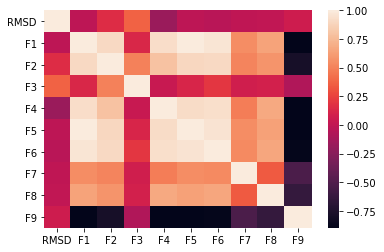

In [6]:
list_of_column_names = data.columns
sns.heatmap(data[list_of_column_names].corr(method="pearson"))

#### Нормализация

In [7]:
data = (data - data.mean()) / data.std()

In [8]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (45730, 10)


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1.558514,0.908472,0.879575,0.240883,1.058739,0.894430,0.996024,0.149537,0.566879,-1.253139
1,-0.282354,-0.906730,-0.952116,-0.640238,-0.903979,-1.001446,-0.834804,-0.331488,-0.548295,0.672793
2,0.249492,-0.528720,-0.881695,-1.255639,-0.653202,-0.518852,-0.912107,-0.505984,-0.725307,0.717126
3,1.324299,-0.356572,-0.443288,-0.338421,-0.643391,-0.279818,-0.517135,-0.371963,0.000441,0.759469
4,0.034891,-0.594055,-0.874415,-1.106638,-0.921608,-0.615703,-0.730217,-0.589562,-0.512893,0.901548
5,-0.988594,-1.171546,-1.295052,-1.325289,-0.934944,-1.233211,-0.943538,-0.378991,-0.973123,1.122878
6,0.255867,-0.972721,-0.950675,-0.446076,-0.600490,-0.957002,-0.983320,-0.586061,0.000441,0.831595
7,-0.942013,-0.736655,-0.837347,-0.669815,-0.473475,-0.800981,-0.699430,-0.250242,0.071246,0.484407
8,-0.953454,0.546655,0.801306,0.703308,0.460254,0.565937,0.581020,0.136952,-0.548295,-0.691009
9,-1.022100,-0.608988,-0.775386,-0.764749,-0.370960,-0.610693,-0.584879,-0.068899,-0.778410,0.148892


Разбиваем данные тест и трейн

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['F1','F2']], data['F6'], test_size=0.33)

Линейная регрессия

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, explained_variance_score

In [12]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [13]:
predictions, y_test

(array([-0.44150931, -0.18188824, -0.74447303, ...,  0.21392177,
         0.25258732, -0.73542866]),
 25909   -0.533264
 7717    -0.365833
 2674    -0.936074
 28313   -0.729796
 27128    1.589217
            ...   
 30259   -0.373219
 41622    0.166672
 44892    0.388589
 10125   -0.095116
 35303   -0.774311
 Name: F6, Length: 15091, dtype: float64)

In [14]:
mean_squared_error(predictions, y_test)

0.057192258803418425

#### Коэффициенты модели

In [15]:
w_0 = model.intercept_
w_1 = model.coef_[0]
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  -0.000361514769310995
w_1 =  0.8085138329748686


In [16]:
model.coef_

array([0.80851383, 0.1746749 ])

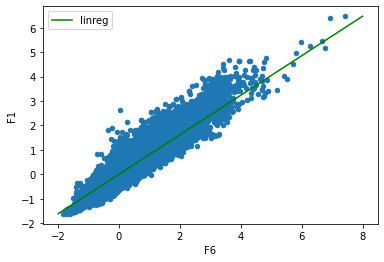

In [17]:
f = lambda x: w_0 + w_1 * x
x = np.linspace(-2, 8, 100)
y_1 = f(x)

data.plot(x='F1', y='F6', kind='scatter')
plt.plot(x, y_1, label='linreg', color='g')

plt.ylabel('F1')
plt.xlabel('F6')
plt.legend(loc='upper left')
plt.show()

Используем все данные

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['F6'], axis=1), data['F6'], test_size=0.33)

In [23]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [24]:
mean_squared_error(predictions, y_test)

4.516962569336307e-31

In [25]:
model.coef_

array([ 1.65050586e-16,  2.83055737e-15, -8.71010296e-16,  3.60541134e-17,
        2.35741997e-16, -2.10832960e-15,  1.00000000e+00,  1.15418313e-16,
        1.29277129e-16,  1.68740453e-16])